# Abstract

# Introduction

# Data (EDA submission)
What is in your data? We are using the dataset found at https://www.kaggle.com/datasets/nayanack/movies-and-directors-dataset-for-film-analytics. It contains two csv files, one with information about movies and the other with information about directors. The directors dataset has three columns: director_name (the name of the director), ID (an ID which acts as a foreign key into the movies dataset), and gender (the gender of the director). The movies dataset has columns for budget, popularity, revenue, title, vote statistics, the ID of the director, and the year/month/day of release.

How will these data be useful for studying the phenomenon you're interested in? We want to analyze what makes a movie successful, whether that is in terms of box office revenue, or awards such as the Oscars, Emmys, etc. We can use this data as a baseline for seeing which films were successful, when it came out, and who directed it. Some super simple stuff to look at could be things like budget to revenue ratio or relation between director and relative succes (based on revenue and/or popularity).

What are the challenges you've resolved or expect to face in using them? Finding additional data to make more inferences into what specifically about these films made them more or less likely to be successful at the box office, or in award shows. We may need to utilize some APIs or additional data sets to better understand why certain movies were more successful (for example looking into things like lead actors or composers for soundtracks could be potential datasets we could look into for additional information).

Our dataset is clean. Below are some simple graphs showing some general information that can be found in the dataset.





In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data/movies.csv")
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1465 non-null   int64  
 1   id            1465 non-null   int64  
 2   budget        1465 non-null   int64  
 3   popularity    1465 non-null   int64  
 4   revenue       1465 non-null   int64  
 5   title         1465 non-null   object 
 6   vote_average  1465 non-null   float64
 7   vote_count    1465 non-null   int64  
 8   director_id   1465 non-null   int64  
 9   year          1465 non-null   int64  
 10  month         1465 non-null   object 
 11  day           1465 non-null   object 
dtypes: float64(1), int64(8), object(3)
memory usage: 137.5+ KB


In [11]:
df.value_counts('month')

month
Dec    193
Sep    166
Oct    149
Jun    133
Jul    127
Nov    117
May    116
Aug    111
Feb    104
Mar     99
Apr     90
Jan     60
dtype: int64

In [12]:
df.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


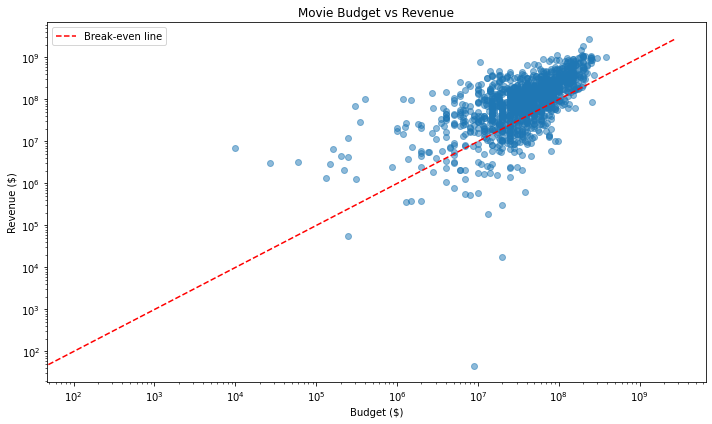

In [13]:
# Scatter plot of movies budget to revenue, with a break-even line showing how films typically performed.
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)

plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Movie Budget vs Revenue')

max_value = max(df['budget'].max(), df['revenue'].max())
plt.plot([0, max_value], [0, max_value], 'r--', label='Break-even line')

plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.tight_layout()
plt.show()

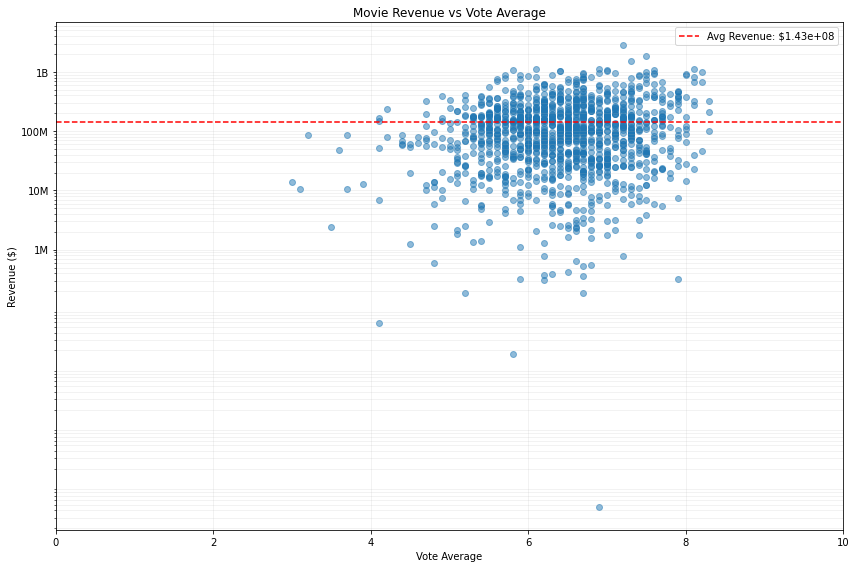

In [15]:
# A scatter plot to see how revenue compares to overall rating, in other words, do movies which gross the highest also receive high praise?
plt.figure(figsize=(12, 8))
plt.scatter(df['vote_average'], df['revenue'], alpha=0.5)

plt.xlabel('Vote Average')
plt.ylabel('Revenue ($)')
plt.title('Movie Revenue vs Vote Average')

plt.yscale('log')
plt.xlim(0, 10)
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.yticks([1e6, 1e7, 1e8, 1e9], ['1M', '10M', '100M', '1B'])

avg_revenue = df['revenue'].mean()
plt.axhline(y=avg_revenue, color='r', linestyle='--', label=f'Avg Revenue: ${avg_revenue:.2e}')

plt.legend()

plt.tight_layout()
plt.show()

In [18]:
df = pd.read_csv("data/directors.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2349 non-null   int64 
 1   director_name  2349 non-null   object
 2   id             2349 non-null   int64 
 3   gender         1724 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.5+ KB


# Methods (preanalysis plan part)

1. What is an observation in your study? An observation in our study will be a particular movie and all of its corresponding data such as director, budget, cast, producer, and many other various factors.

2. Are you doing supervised or unsupervised learning? Classification or regression? We will be using regression since the goal of our analysis is to predict the success of a movie based on known facts (such as budget, director, etc).

3. What models or algorithms do you plan to use in your analysis? How? A multivariate linear regression. We may also employ ridge or lasso regressions as we develop our testing if we feel they better fit our data.

4. How will you know if your approach 'works'? What does success mean? We will define the success of our approach as being able to correctly identify how much revenue a film will make. A ‘successful’ film in our analysis will be based on the financial success, so our model’s approach will be to predict the revenue of a film based on its characteristics.

5. What are weaknesses you anticipate being an issue? How will you deal with them if they come up? If your approach fails, what might you learn from this unfortunate outcome? Mostly data quality. Missing and incomplete data in important columns like budget and revenue could lead to major issues. One possible way to deal with them could be to make reasonable estimates for missing columns by using averages or predictive models.

6. Feature Engineering: How will you prepare your data specifically for your analysis? For example, are there many variables that should be one-hot encoded? Do you have many correlated numeric variables, for which PCA may be a useful tool? No, all of our data is already in the form of a numeric representation, including the director as our data set has a director ID column which we can use as a form of one-hot encoding built into the data set. PCA may be useful given we have a number of numeric variables which are related, such as revenue, budget, and popularity.

7. Results: How will you communicate or present your results? We can communicate our results by presenting the R-squared values and regression coefficients to show how our model predicted the revenue made on films.


# Results
Introduction
Understanding what drives a movie's financial success is a critical challenge for the film industry. By identifying key predictors of revenue, studios can make informed decisions about budgeting, marketing, and release strategies. These predictors like release date are even more relevant now due to the rise of streaming services, as studios rely on high success of films and large revenues to compete with the online only entertainment model of streaming. By finding what factors are most related to revenue, studios can change their strategy and allocate resources to maximize revenue. This analysis focuses on predicting movie revenue using a streamlined set of predictors: budget, audience ratings (vote count and average), director gender, and release date.

Our goal is to develop a regression model that evaluates how these factors contribute to box office performance. Budget reflects the scale of production and marketing efforts, while vote count and average represent audience reception and critical acclaim. Director gender provides insight into demographic influences, and release date captures seasonal and temporal trends that may affect audience turnout.

Through this approach, we aim to highlight the relative importance of these predictors in driving revenue, offering actionable insights for optimizing future film projects. By focusing on these targeted variables, we provide a practical framework for understanding the interplay between production decisions and financial outcomes in the movie industry.

Prediction question: Which production and release factors most effectively predict a movie's revenue?


In [20]:
import pandas as pd

directors = pd.read_csv("data/directors.csv")
movies = pd.read_csv("data/movies.csv")


# To ensure reliability of our model, we removed movies with 0 budget or revenue, as they are erroneous or
# likely incomplete data and could skew our model.
movies = movies.drop(movies[movies.revenue == 0].index)
movies = movies.drop(movies[movies.budget == 0].index)

# Length of title as possible indicator of success
movies['title_word_count'] = movies['title'].str.split().str.len()

# Get rid of the column that is just the index from the data set
movies.drop('Unnamed: 0', axis=1, inplace=True)

# Take gender column from directors and bring into movies
director_gender_dict = directors.set_index('id')['gender']
movies['director_id'] = movies['director_id'].astype(directors['id'].dtype)
movies['dir_gender'] = movies['director_id'].map(director_gender_dict)

# Still left with about 1200
movies.describe()

,id,budget,popularity,revenue,vote_average,vote_count,director_id,year,title_word_count
count,1239.000000,1.239000e+03,1239.000000,1.239000e+03,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,45057.979015,5.486410e+07,34.866828,1.683258e+08,6.410977,1325.239709,5011.858757,2002.773204,2.752220
std,1109.276646,5.015137e+07,36.355286,2.150666e+08,0.812727,1652.486891,232.109408,8.719061,1.644723
min,43597.000000,1.000000e+04,0.000000,4.600000e+01,3.000000,9.000000,4762.000000,1976.000000,1.000000
25%,44129.500000,2.000000e+07,15.000000,3.907801e+07,5.900000,330.500000,4833.000000,1998.000000,2.000000
50%,44836.000000,4.000000e+07,27.000000,1.008538e+08,6.500000,755.000000,4947.000000,2004.000000,2.000000
75%,45730.500000,7.500000e+07,44.000000,2.083560e+08,7.000000,1582.000000,5130.000000,2010.000000,3.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,6204.000000,2016.000000,12.000000


We started by removing movies in the dataset that had no revenue and/or no budget as unlikely a movie made/cost $0. So removed these movies as they were erroneous and would skew our model. Since we are trying to predict a movie's success based on its revenue movie's without their revenue listed are unhelpful for training and testing the model. We also dropped movies without a budget since budget is an important predictor variable for our model. We thought it would be interesting to look at the length of movie titles and see if there is any distinct correlation between title length and movie success. There was an index/primary key column in the dataset that we removed since it is not actually "data". The data was split into two files so we took the information we are interested in, director gender, from the directors.csv and added it to the data taken from movies.

In [21]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,title_word_count,dir_gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,1,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,7,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,1,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,4,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,2,Male


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

"""
Regressing on all the variables we've got in the dataset as a starting point to see multivariate linear regression performance.
From here could be good to try without certain variables to reduce overfitting, and looking into other ways to increase model performance.
"""

numeric_features = [
    'budget',
    'popularity',
    'vote_average',
    'vote_count',
    'year',
    'title_word_count',
]

categorical_features = [
    'dir_gender',
    'month',
    'day',
]

target = 'revenue'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Basically just using all the general setup from lab examples

X = movies[numeric_features + categorical_features]
y = movies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))
print()

feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)

# Show us all the coefficient values (i.e. how does this variable effect our overall score?)
coefficients = model.named_steps['regressor'].coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")

output_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
display(output_table)

Mean Squared Error: 1.5027985840445952e+16
R-squared Score: 0.6472199749635872

budget: 91236411.22618926
popularity: 7768677.241590977
vote_average: -12497103.305226693
vote_count: 109417057.84917936
year: -18443405.302621152
title_word_count: 9085187.372003987
dir_gender_Male: -2231554.2122005913
dir_gender_nan: -1352422.6130283107
month_Aug: -7190901.63589171
month_Dec: 34478533.397801675
month_Feb: -34861243.94652489
month_Jan: -16297035.237012189
month_Jul: -8129209.975163342
month_Jun: 18235251.204572923
month_Mar: -17519475.339235306
month_May: 18968851.860462625
month_Nov: 36057081.49483458
month_Oct: -17107757.632950976
month_Sep: -7662446.580206681
day_Monday: -4457799.016432256
day_Saturday: -10578975.943551904
day_Sunday: 10042193.983900001
day_Thursday: -4198816.22008427
day_Tuesday: 31616751.71004254
day_Wednesday: -9118627.235725699


,Feature,Coefficient
0,budget,9.123641e+07
1,popularity,7.768677e+06
2,vote_average,-1.249710e+07
3,vote_count,1.094171e+08
4,year,-1.844341e+07
5,title_word_count,9.085187e+06
6,dir_gender_Male,-2.231554e+06
7,dir_gender_nan,-1.352423e+06
8,month_Aug,-7.190902e+06
9,month_Dec,3.447853e+07


In [23]:
# Removing some variables to improve model performance by hopefully reducing overfitting


numeric_features = [
    'budget',
    'popularity',
    'vote_average',
    'vote_count',
    'year',
    'title_word_count',
]

categorical_features = [
    'dir_gender',
    'month',
    'day',
]

numeric_features.remove('popularity')
numeric_features.remove('vote_average')
numeric_features.remove('title_word_count')
# Removed vote_average and title word count due to feeling these are most likely least involved in budget
categorical_features.remove('day')
categorical_features.remove('dir_gender')
# Same reasoning as above, especially day as feel is least influential on movie revenue out of all variables

target = 'revenue'


#All same code as previous cell, just rebuilding model with restricted variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X = movies[numeric_features + categorical_features]
y = movies[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))
print()

feature_names = (
    numeric_features +
    list(model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)

# Show us all the coefficient values (i.e. how does this variable effect our overall score?)
coefficients = model.named_steps['regressor'].coef_

output_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
display(output_table)

Mean Squared Error: 1.4353943614834582e+16
R-squared Score: 0.6630430290808462



,Feature,Coefficient
0,budget,9.791238e+07
1,vote_count,1.073579e+08
2,year,-1.540430e+07
3,month_Aug,-2.265068e+06
4,month_Dec,3.037104e+07
5,month_Feb,-2.955853e+07
6,month_Jan,-8.061325e+06
7,month_Jul,-6.358390e+06
8,month_Jun,2.178237e+07
9,month_Mar,-1.495723e+07


Takeaways after first regression thus far:
- R^2 is 0.63, which is pretty solid performance. Generally, > 0.5 is ideal. Closer to 0.7 should be a target. PCA may be helpful for this.
- MSE is really big (1.57e+16) but this is probably ok (?) since some movies are less popular while others (e.g. Avatar) have huge box office performance
  - maybe look into this though
- budget is highly correlated which seems fairly obvious
- male directors on average perform better, but NaN even more so (might just be coincidence)
- december and november do quite well, maybe due to Christmas/family holidays/it's winter so nothing else to do
- days seem a bit arbitrary (i don't see why Tuesday would perform better than Saturday)
  - Some movie theaters have discounts on movie tickets on certain days. For example, AMC Theaters has $5 dollar tickets for any movie for members on Tuesdays.
- the year one is a bit odd to me, but maybe this is due to inflation or some sort of lack of adjustment
  - doing a basic plot shows that revenue seems to definitely increase though not as much as i expected
- after the fact I've added a title_length and this seems to have brought MSE down to 1.5e+16 and R2 to 0.647, which is a decent boost for a little extra calculation

Second regression with removed variables takeaways:
- R^2 was slightly higher at 0.66 which is a small improvement
- MSE went down to 1.43, possibly due to removing year so likely reduced noise or multicollinearity as could have been correlated to other features like budget (as budgets probably increased over time due to inflation)

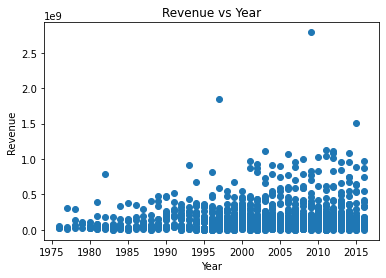

             year   revenue
year     1.000000  0.144894
revenue  0.144894  1.000000


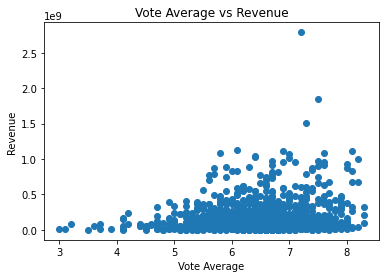

In [24]:
import matplotlib.pyplot as plt
plt.scatter(movies['year'], movies['revenue'])
plt.title('Revenue vs Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

print(movies[['year', 'revenue']].corr())

plt.scatter(movies['vote_average'], movies['revenue'])
plt.title('Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

There are more points in more recent years. This could be because the dataset mostly focused on recent movies (or there was just more easily accessible information for recent movies) or it could be that in recent years more movies come out each year. An interesting area for future study might be comparing the rate of inflation to the increase in revenue over the year to see if the revenue of movies increased proportionally to inflation or if move quantity had a negative impact on quality (as determined by revenue).

It is every interesting how vote average doesn't directly correspond to higher revenue with the highest earning movies seeming to have around 6 or 7 average opposed to 8. This could mean that large blockbusters with super high budgets and famous actors like Transformers are not the most well received by critics but are simply meant to get people through the door.

In [25]:
X = movies[['budget', 'vote_average']]
y = movies['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:")
for feature, coef in zip(['budget', 'vote_average'], model.coef_):
    print(f"{feature}: {coef}")

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Coefficients:
budget: 156055543.29145432
vote_average: 49237562.8143738
Mean Squared Error: 2.067549316290047e+16
R-squared Score: 0.5146454705847817


MSE and R2 perform worse with just budget and vote average. Was curious to see if the other stuff was just adding noise.

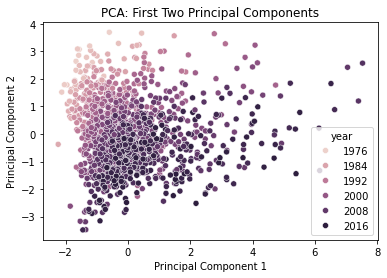

Train R^2: 0.6226448220043007
Test R^2: 0.642971603829902


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/movies.csv')

# Select relevant features
features = ['budget', 'vote_count', 'vote_average', 'year']
X = data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Adjust number of components based on explained variance
principal_components = pca.fit_transform(X_scaled)

# Add principal components to the dataset for analysis
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Visualize first two principal components (scatter plot)
sns.scatterplot(x=data['PC1'], y=data['PC2'], hue=data['year'])  # Example hue variable
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Split data for regression analysis
y = data['revenue']  # target variable
X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size=0.2, random_state=42)

# Linear regression on principal components
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and performance evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train R^2:', r2_score(y_train, y_train_pred))
print('Test R^2:', r2_score(y_test, y_test_pred))


 Key Insights from Initial Analysis

**Variable Performance:**



*   Budget: Strongly correlated with revenue (+91.2M coefficient). Expected, as
larger budgets typically translate to higher production quality and marketing reach.

*   Vote Count: High correlation with revenue (+109.4M coefficient), suggesting audience engagement as a strong predictor.

*   Release Month:
Positive effects for December (+34.5M) and November (+36M) align with holiday seasons when blockbuster releases are common.

*   Director Gender:
Male directors show a slightly negative coefficient (-2.2M), with missing gender values (NaN) also underperforming (-1.3M). These differences are minor and may not be statistically significant.

*   Model Performance:
R² Score (0.647): Indicates a moderately strong model. There's room to improve by addressing noise and adding meaningful predictors.
MSE (1.5e+16): Likely due to the large range of revenues (e.g., small indies vs. blockbusters like Avatar).

# Conclusion
In conclusion, our analysis reveals that several production and release factors, particularly budget, vote count, and release timing, significantly impact a movie's financial success. Budget was the most influential predictor, which aligns with the understanding that higher investments in production and marketing generally yield higher revenues. Audience reception, represented by vote count and average ratings, also demonstrated a positive correlation with revenue. Additionally, release timing, especially in November and December, showed a strong seasonal influence, likely due to holiday-driven audience turnout.

The predictive model achieved a reasonable R-squared score of 0.647, suggesting a fair ability to explain variability in movie revenues. However, high MSE values indicate potential challenges in capturing the extreme variations between blockbuster hits and less successful films. Incorporating more sophisticated techniques like PCA or LASSO regression could further refine the model by reducing multicollinearity and overfitting, improving generalizability.

Future directions could explore inflation-adjusted revenue trends, deeper demographic analysis of directors and audiences, and the impact of title characteristics on success. These insights can provide more nuanced recommendations for the film industry, aiding in optimizing production strategies and release planning.

# Conclusion

In conclusion, our analysis reveals that several production and release factors, particularly budget, vote count, and release timing, significantly impact a movie's financial success. Budget was the most influential predictor, which aligns with the understanding that higher investments in production and marketing generally yield higher revenues. Audience reception, represented by vote count and average ratings, also demonstrated a positive correlation with revenue, showing that films with broad appeal and receiving critical acclaim tend to do better overall at the box office. Additionally, release timing, especially in November and December, showed a strong seasonal influence, likely due to holiday-driven audience turnout.

### Key Findings

1. Budget as a predictor:

The correlation between budget and revenue seen in our results (+91.2M coefficient) shows that larger investments in movie production and marketing lead to better success and these findings align with industry practices where large-scale films from well known studios who can spend a lot of money do the best at the box office.


2. Audience Reception:

Higher vote count positively impacted revenue (+109.4M coefficient), reflecting how films that created buzz and led to audience engagement had increased revenue. However, vote averages did not always mean greater revenues. This may sugges that blockbusters that are aiming to make the most money may prioritize appealing to the greatest range of audiences while not caring as much about the opinions of critics.


3. Seasonal Trends:

The impact of releases in November (+36M coefficient) and December (+34.5M) shows the importance of studios releasing movies around the holidays. Studios may benefit from scheduling releases during this period to take advantage of increased audience numbers.



### Model Performance

Our regression model was able to achieve a reasonable R-squared score of 0.647, and by removing some variables, was able to get a R-squared of 0.663, indicating a moderate amount of explanatory power. Our high MSE of 1.502 shows the challenge of modeling such a wide range of revenue outcomes across many different studios including indie films and massive blockbusters.


### Future Directions

To build upon our findings, future research could explore the following extensions

1. Incorporating Advanced Models:

Leveraging machine learning algorithms like PCA, LASSO, or neural networks could help reduce the multicollinearity. It would better help the capture of nonlinear relationships between predictors and revenue. 


2. Audience Demographics:

Investigating how certain audience demographics like age, gender, location, and income could lead to a better understanding of predictors into film success.



 
3. Movie Characteristics:

Looking into how certain movie genres or subject matter lead to higher revenue and audience reception could help optimize marketing strategies and give studios insight into what type of movies will perform the best. 



4. Inflation Adjusted Trends: 

Standardizing the budget and revenue for inflation and comparing trends over time could lead to a better understanding and insight into long-term shifts in box office performance.

### Final Thoughts

This analysis provides a good foundation for how certain variables affect movie revenue and provides insights for how studios can improve performance. By addressing certain limitations, implementing more specific data, and using advanced algorithms, further research can improve understanding and create more accurate models. As the film industry evolves, a need to adapt to compete against streaming platforms is highlighted even more. Integrating such models will remain crucial for a competitive advantage and staying relevant in a highly competitive landscape.


